# First Kaggle challenge - Titanic

![](../img/titanic.jpg)

## Machine Learning from Disaster

- v1.1_042020
- author: marcusRB
- [Kaggle - Titanic challenge](https://www.kaggle.com/c/titanic/)



Esta es la legendaria competición de Titanic ML: el mejor primer desafío para que te sumerjas en las competencias ML y te familiarices con el funcionamiento de la plataforma Kaggle.

La competencia es simple: use el aprendizaje automático para crear un modelo que prediga qué pasajeros sobrevivieron al naufragio del Titanic.

### The Challenge

El hundimiento del Titanic es uno de los naufragios más infames de la historia.

El 15 de abril de 1912, durante su viaje inaugural, el ampliamente considerado "insumergible" RMS Titanic se hundió después de chocar con un iceberg. Desafortunadamente, no había suficientes botes salvavidas para todos a bordo, lo que resultó en la muerte de 1502 de 2224 pasajeros y tripulantes.

Si bien hubo algún elemento de suerte involucrado en la supervivencia, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros.

En este desafío, le pedimos que cree un modelo predictivo que responda a la pregunta: "¿qué tipo de personas tenían más probabilidades de sobrevivir?" utilizando datos de pasajeros (es decir, nombre, edad, sexo, clase socioeconómica, etc.).

### What Data Will I Use in This Competition?
En esta competición, obtendrá acceso a dos conjuntos de datos similares que incluyen información de pasajeros como nombre, edad, sexo, clase socioeconómica, etc. Un conjunto de datos se titula `train.csv` y el otro se titula `test.csv` .

Train.csv contendrá los detalles de un subconjunto de los pasajeros a bordo (891 para ser exactos) y, lo que es más importante, revelará si sobrevivieron o no, también conocida como la "verdad fundamental".

El conjunto de datos `test.csv` contiene información similar pero no revela la" verdad fundamental "para cada pasajero. Es su trabajo predecir estos resultados.

Usando los patrones que encuentra en los datos de train.csv, prediga si los otros 418 pasajeros a bordo (que se encuentran en test.csv) sobrevivieron.


## Workflow stages
The competition solution workflow goes through seven stages described in the Data Science Solutions book.

1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

## Check the versions of libraries

In [1]:
# Check the versions of libraries MacOS

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.3 | packaged by conda-forge | (default, Jul  1 2019, 21:52:21) 
[GCC 7.3.0]
scipy: 1.4.1
numpy: 1.17.2
matplotlib: 3.1.1
pandas: 1.0.3
sklearn: 0.21.3


In [2]:
# Check the versions of libraries Win10 Docker - en caso de instalar nuevos paquetes o actualizaciones
#!pip install --upgrade pandas
#!pip install --upgrade sklearn
#!pip install keras
#!pip install tensorflow

***

## Import Libraries

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from scipy.stats import norm, skew
from scipy import stats
import xlrd, xdrlib

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

***

## Load dataset desde KAGGLE API

Kaggle tiene una API para interactuar directamente con las competiciones.
- https://github.com/Kaggle/kaggle-api

**IMPORTANTE** : Comentar las filas que no se utilizarán

In [ ]:
# descargamos la libreria
!pip install --upgrade kaggle
import kaggle

Desde https://www.kaggle.com/USER/account descargamos el Token de KAGGLE - el fichero es kaggle.json y seguimos las instrucciones 

In [ ]:
# restringir los permisos del directorio
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c titanic

In [6]:
!unzip -o titanic.zip

* * *
## Load dataset download desde la web

In [7]:
# Load dataset train and test
train_titanic = pd.read_csv('train.csv')
test_titanic = pd.read_csv('test.csv')
ids = test_titanic['PassengerId']

# concat these two datasets, this will come handy while processing the data
titanic_list =  pd.concat(objs=[train_titanic, test_titanic], axis=0).reset_index(drop=True)

In [8]:
titanic_list

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
train_titanic.shape, test_titanic.shape

((891, 12), (418, 11))

In [10]:
train_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
train_titanic.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [12]:
titanic_list[891:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
891,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
892,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
893,894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
894,895,NaN,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
895,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


***

## Data description

Nuestro conjunto de datos tiene 12 columnas o varables, de las cuales 3 (Age, Cabin y Embarked) tienen valores no disponibles. La variable que queremos predecir es Survived, que nos indica si el pasajero sobrevivió a la tragedia del Titanic.

In [13]:
# Check dataframe structure
titanic_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [14]:
# Check dataframe basic stats data
#stats(titanic_list)

In [15]:
# Check test dataframe basic stats data
titanic_list.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


***

## EDA, Visualization and transformation data

We analyze all variable one by one and check null value, errors or we create new variables.

In [16]:
# Check null and NA values for both dataset
titanic_list.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [17]:
# Table of relative frequency
titanic_list.isnull().sum()/len(titanic_list)*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

We need to check those 3 features, but it must probable remove `Cabin`, there are many null values.

### `PassengerId`
Id of the passenger. We remove it because haven't predictive weight on our model.

In [18]:
# Check first 10 elements
titanic_list['PassengerId'].head(10)

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: PassengerId, dtype: int64

In [19]:
# Remove PassengerId variable only for train dataset
titanic_list.drop(['PassengerId'], axis=1, inplace=True)

In [20]:
# Check train dataset
titanic_list.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### `Survived`

This is our depedent variable or predictor, it check if passenger survived (`1`) or not (`0`). Almost 38% of passenger survived.

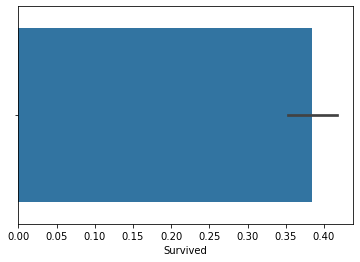

In [21]:
titanic_list['Survived'][:891] = titanic_list['Survived'][:891].astype(int)
sns.barplot(x="Survived", data=titanic_list)

In [22]:
titanic_list.describe()['Survived']

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

### `Pclass`

Ticket class. This is a categorical feature with 3 different values, first class, second class and third class. Exist high correlation between this feature with dependent variable.

In [23]:
titanic_list[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


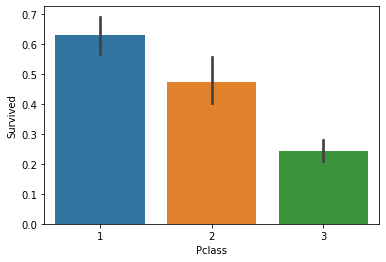

In [24]:
sns.barplot(x="Pclass", y="Survived", data=titanic_list)

### `Sex`

Passenger genre. It's a categorical feature with two values, `male` y `female`. We converted it a dummy or binary value.

female    466
male      843
Name: Sex, dtype: int64
female    0.355997
male      0.644003
Name: Sex, dtype: float64


Text(0.5, 1, 'Survive v/s Sex')

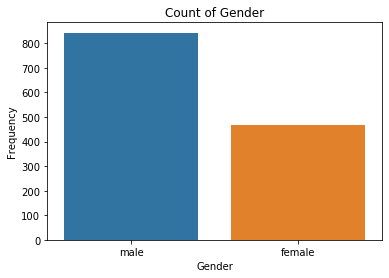

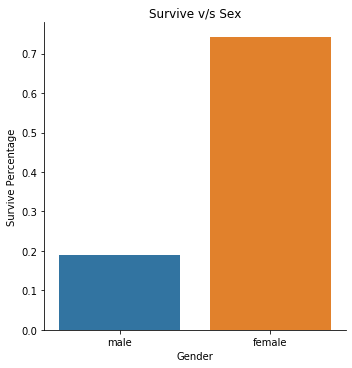

In [25]:
# Now visualization of 'Gender'
# Printing counts and percentage of male and female
print(titanic_list['Sex'].value_counts(sort=False))
print(titanic_list['Sex'].value_counts(sort=False,normalize=True))

# Making variable  categorical 
#sub['SEX'] = sub['SEX'].astype('category')

# Visualising counts of Gender with bar graph
sns.countplot(x="Sex", data=titanic_list);
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Count of Gender')

# Showing proportion of survival for different type of gender
sns.catplot(x="Sex", y="Survived", data=titanic_list, kind="bar", ci=None)
plt.xlabel('Gender')
plt.ylabel('Survive Percentage')
plt.title('Survive v/s Sex')

In [26]:
# Check the survived ratio with sex
titanic_list[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


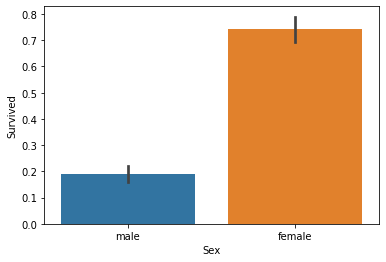

In [27]:
sns.barplot(x="Sex", y="Survived", data=titanic_list)

In [28]:
# Convert categorical variable to binary variable - female 1 and male 0
titanic_list['Sex'] = titanic_list['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [29]:
# Check Sex features
titanic_list.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


### `SibSp`

Numerical feature. Indicate a sibling of passenger.

In [30]:
titanic_list[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


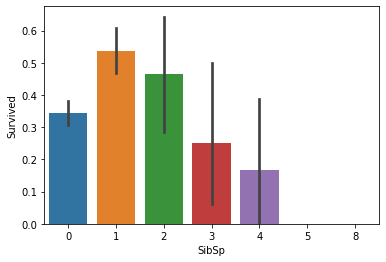

In [31]:
sns.barplot(x="SibSp", y="Survived", data=titanic_list)

### `Parch`

Father and childs of passenger. Numerical variable

In [32]:
titanic_list[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000
7,9,NaN


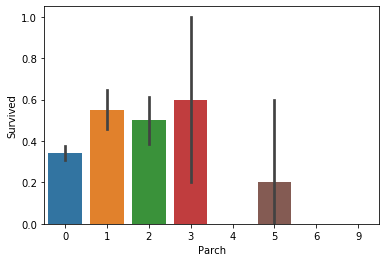

In [33]:
sns.barplot(x="Parch", y="Survived", data=titanic_list)

### `FamilySize`

Create new feature, called FamilySize, where we summarize `SibSp` and `Parch` as numerical variable.

In [34]:
# Create a new feature, family size included passenger alone
titanic_list['FamilySize'] = titanic_list['SibSp'] + titanic_list['Parch'] + 1

In [35]:
titanic_list[["FamilySize", "Survived"]].groupby(['FamilySize'], as_index=False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


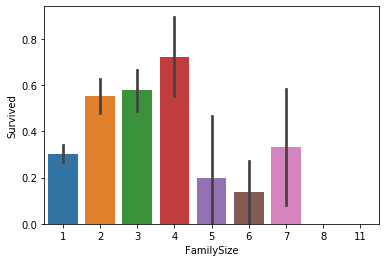

In [36]:
sns.barplot(x="FamilySize", y="Survived", data=titanic_list)

### `IsAlone`

We create new feature caracterized if passanger travel alone or not, based on familySize. The binary feature is called `IsAlone`.

In [37]:
titanic_list['IsAlone'] = 0
titanic_list.loc[titanic_list['FamilySize'] == 1, 'IsAlone'] = 1

In [38]:
# Check new feature with predictor    
titanic_list[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


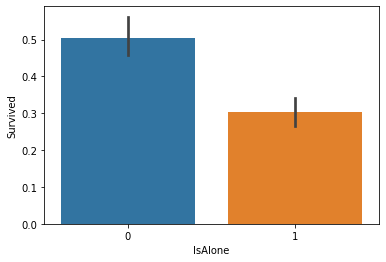

In [39]:
sns.barplot(x="IsAlone", y="Survived", data=titanic_list)

### `Ticket`

Ticket number of the passanger. In first instance isn't important for the model. We removed it.

In [40]:
# We remove Ticket variable in both traing and test dataset
titanic_list.drop(['Ticket'], axis=1, inplace=True)

In [41]:
# We check the dataset again - train
titanic_list.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,IsAlone
0,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,NaN,S,2,0
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C85,C,2,0
2,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,NaN,S,1,1
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,C123,S,2,0
4,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,NaN,S,1,1
5,0.0,3,"Moran, Mr. James",0,NaN,0,0,8.4583,NaN,Q,1,1
6,0.0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,51.8625,E46,S,1,1
7,0.0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,21.0750,NaN,S,5,0
8,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,11.1333,NaN,S,3,0
9,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,30.0708,NaN,C,2,0


### `Embarked`

This feature is Port of Embarkation. There are three categorical variables: `C` for Cherbourg, `Q` for Queenstown, `S` for Southampton.

In [42]:
# Check ratio Embarked and Survived variable
titanic_list[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [43]:
# Fill na or null values with the most frequent value, C
freq_port = titanic_list.Embarked.dropna().mode()[0]
freq_port

'S'

In [44]:
# Assign result on the dataset
titanic_list['Embarked'] = titanic_list['Embarked'].fillna(freq_port)

In [ ]:
# Check ratio Embarked and Survived variable
titanic_list[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

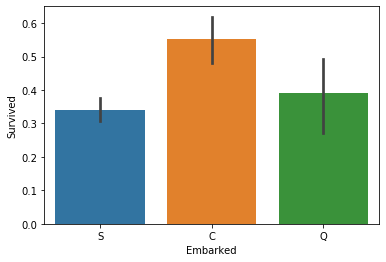

In [45]:
sns.barplot(x="Embarked", y="Survived", data=titanic_list)

### `Fare`

This continuous numerical variable is ticket fare of the passenger.

In [46]:
# Doing same steps before for the second dataset
s = titanic_list['Fare'].value_counts(normalize=True)
missing = titanic_list['Fare'].isnull()
titanic_list.loc[missing,'Fare'] = np.random.choice(s.index, size=len(titanic_list[missing]),
                                                      p=s.values).astype(int)
titanic_list['Fare']

0         7.2500
1        71.2833
2         7.9250
3        53.1000
4         8.0500
          ...   
1304      8.0500
1305    108.9000
1306      7.2500
1307      8.0500
1308     22.3583
Name: Fare, Length: 1309, dtype: float64

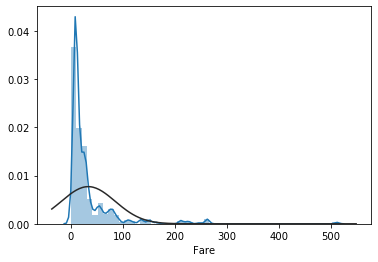

In [47]:
sns.distplot(titanic_list['Fare'], fit=norm)

After check the variable, has a normal distribution. We apply a logarithm to normalize. 

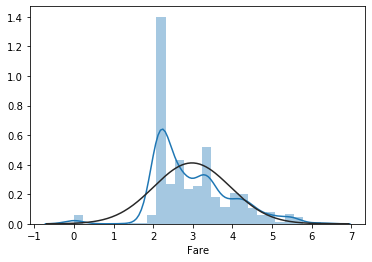

In [48]:
titanic_list['Fare'] = np.log1p(titanic_list['Fare'],)
sns.distplot(titanic_list['Fare'], fit=norm)

We transform to categorical variable

In [49]:
titanic_list['FareGroup'] = pd.qcut(titanic_list['Fare'], 5, labels=['A', 'B', 'C', 'D'])

In [50]:
titanic_list[['FareGroup', 'Survived']].groupby(['FareGroup'], as_index=False).mean()

,FareGroup,Survived
0,A,0.217877
1,B,0.201087
2,C,0.426901
3,D,0.443243
4,E,0.645349


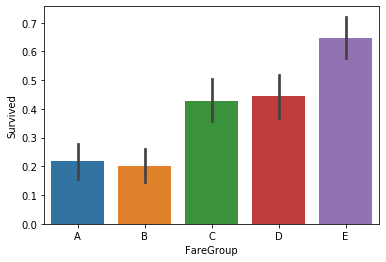

In [51]:
sns.barplot(x="FareGroup", y="Survived", data=titanic_list)

### `Cabin`

We transform this feature in binary variable, so it inform if he was or not in the cabin.

In [52]:
#!pip install tabulate

In [53]:
pd.unique(titanic_list['Cabin'])

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

D26            2
E63            1
G6             5
C90            1
C23 C25 C27    6
              ..
C104           1
B49            2
C110           1
F E57          1
C68            2
Name: Cabin, Length: 186, dtype: int64
D26            0.006780
E63            0.003390
G6             0.016949
C90            0.003390
C23 C25 C27    0.020339
                 ...   
C104           0.003390
B49            0.006780
C110           0.003390
F E57          0.003390
C68            0.006780
Name: Cabin, Length: 186, dtype: float64


Text(0.5, 1, 'Survive v/s Cabin')

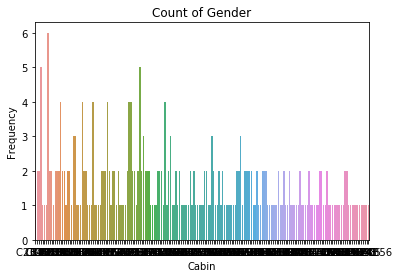

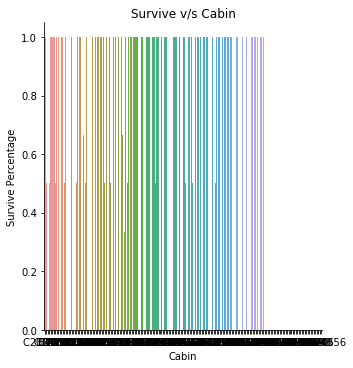

In [54]:
# Now visualization of 'Gender'
# Printing counts and percentage of male and female
print(titanic_list['Cabin'].value_counts(sort=False))
print(titanic_list['Cabin'].value_counts(sort=False,normalize=True))

# Making variable  categorical 
#sub['SEX'] = sub['SEX'].astype('category')

# Visualising counts of Gender with bar graph
sns.countplot(x="Cabin", data=titanic_list);
plt.xlabel('Cabin')
plt.ylabel('Frequency')
plt.title('Count of Gender')

# Showing proportion of survival for different type of gender
sns.catplot(x="Cabin", y="Survived", data=titanic_list, kind="bar", ci=None)
plt.xlabel('Cabin')
plt.ylabel('Survive Percentage')
plt.title('Survive v/s Cabin')

In [55]:
titanic_list["Cabin"].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
B96 B98            4
                  ..
B52 B54 B56        1
A36                1
B80                1
E60                1
D9                 1
Name: Cabin, Length: 186, dtype: int64

In [56]:
# Create new variable InCabin
titanic_list['InCabin'] = ~titanic_list['Cabin'].isnull()

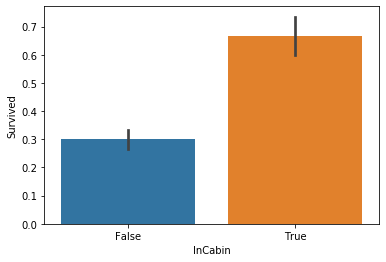

In [57]:
sns.barplot(x="InCabin", y="Survived", data=titanic_list)
plt.show()

In [58]:
#Turning cabin number into Deck
#cabin_only = titanic_list[["Cabin"]].copy()
titanic_list["Cabin_Data"] = titanic_list["Cabin"].isnull().apply(lambda x: not x)

In [59]:
titanic_list["Cabin_Data"]

0       False
1        True
2       False
3        True
4       False
        ...  
1304    False
1305     True
1306    False
1307    False
1308    False
Name: Cabin_Data, Length: 1309, dtype: bool

In [60]:
titanic_list["Deck"] = titanic_list["Cabin"].str.slice(0,1)
titanic_list["Room"] = titanic_list["Cabin"].str.slice(1,5).str.extract("([0-9]+)", expand=False).astype("float")
titanic_list[titanic_list["Cabin_Data"]]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,IsAlone,FareGroup,InCabin,Cabin_Data,Deck,Room
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.280593,C85,C,2,0,E,True,True,C,85.0
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.990834,C123,S,2,0,E,True,True,C,123.0
6,0.0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,3.967694,E46,S,1,1,E,True,True,E,46.0
10,1.0,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,2.873565,G6,S,3,0,C,True,True,G,6.0
11,1.0,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,3.316003,C103,S,1,1,D,True,True,C,103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,NaN,1,"Frauenthal, Mr. Isaac Gerald",0,43.0,1,0,3.357622,D40,C,2,0,D,True,True,D,40.0
1296,NaN,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",0,20.0,0,0,2.698841,D38,C,1,1,C,True,True,D,38.0
1298,NaN,1,"Widener, Mr. George Dunton",0,50.0,1,1,5.358942,C80,C,3,0,E,True,True,C,80.0
1302,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",1,37.0,1,0,4.510860,C78,Q,2,0,E,True,True,C,78.0


In [61]:
titanic_list[titanic_list["Deck"]=="F"]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,IsAlone,FareGroup,InCabin,Cabin_Data,Deck,Room
66,1.0,2,"Nye, Mrs. (Elizabeth Ramell)",1,29.0,0,0,2.442347,F33,S,1,1,B,True,True,F,33.0
75,0.0,3,"Moen, Mr. Sigurd Hansen",0,25.0,0,0,2.157559,F G73,S,1,1,A,True,True,F,73.0
128,1.0,3,"Peter, Miss. Anna",1,NaN,1,1,3.150952,F E69,C,3,0,D,True,True,F,69.0
148,0.0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",0,36.5,0,2,3.295837,F2,S,3,0,D,True,True,F,2.0
183,1.0,2,"Becker, Master. Richard F",0,1.0,2,1,3.688879,F4,S,4,0,D,True,True,F,4.0
193,1.0,2,"Navratil, Master. Michel M",0,3.0,1,1,3.295837,F2,S,3,0,D,True,True,F,2.0
340,1.0,2,"Navratil, Master. Edmond Roger",0,2.0,1,1,3.295837,F2,S,3,0,D,True,True,F,2.0
345,1.0,2,"Brown, Miss. Amelia ""Mildred""",1,24.0,0,0,2.639057,F33,S,1,1,C,True,True,F,33.0
516,1.0,2,"Lemore, Mrs. (Amelia Milley)",1,34.0,0,0,2.442347,F33,S,1,1,B,True,True,F,33.0
618,1.0,2,"Becker, Miss. Marion Louise",1,4.0,2,1,3.688879,F4,S,4,0,D,True,True,F,4.0


First we'll drop the Cabin and Cabin_Data columns.

In [62]:
titanic_list.drop(["Cabin", "Cabin_Data"], axis=1, inplace=True, errors="ignore")

Now we'll deal with the missing values. For the deck column we will replace the null values with an unused letter to represent lack of data. For the room number we will simply use the mean.

In [63]:
titanic_list["Deck"] = titanic_list["Deck"].fillna("N")
titanic_list["Room"] = round(titanic_list["Room"].fillna(titanic_list["Room"].mean()),4)

In [64]:
titanic_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    float64 
 1   Pclass      1309 non-null   int64   
 2   Name        1309 non-null   object  
 3   Sex         1309 non-null   int64   
 4   Age         1046 non-null   float64 
 5   SibSp       1309 non-null   int64   
 6   Parch       1309 non-null   int64   
 7   Fare        1309 non-null   float64 
 8   Embarked    1309 non-null   object  
 9   FamilySize  1309 non-null   int64   
 10  IsAlone     1309 non-null   int64   
 11  FareGroup   1309 non-null   category
 12  InCabin     1309 non-null   bool    
 13  Deck        1309 non-null   object  
 14  Room        1309 non-null   float64 
dtypes: bool(1), category(1), float64(4), int64(6), object(3)
memory usage: 135.8+ KB


In [65]:
def one_hot_column(df, label, drop_col=False):
    '''
    This function will one hot encode the chosen column.
    Args:
        df: Pandas dataframe
        label: Label of the column to encode
        drop_col: boolean to decide if the chosen column should be dropped
    Returns:
        pandas dataframe with the given encoding
    '''
    one_hot = pd.get_dummies(df[label], prefix=label)
    if drop_col:
        df = df.drop(label, axis=1)
    df = df.join(one_hot)
    return df


def one_hot(df, labels, drop_col=False):
    '''
    This function will one hot encode a list of columns.
    Args:
        df: Pandas dataframe
        labels: list of the columns to encode
        drop_col: boolean to decide if the chosen column should be dropped
    Returns:
        pandas dataframe with the given encoding
    '''
    for label in labels:
        df = one_hot_column(df, label, drop_col)
    return df

In [66]:
#titanic_list = one_hot(titanic_list, ["Deck"],drop_col=True)

In [67]:
titanic_list.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,FareGroup,InCabin,Deck,Room
0,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,2.110213,S,2,0,A,False,N,49.6159
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.280593,C,2,0,E,True,C,85.0000
2,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.188856,S,1,1,B,False,N,49.6159
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.990834,S,2,0,E,True,C,123.0000
4,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.202765,S,1,1,B,False,N,49.6159


In [68]:
#cabin_only.columns.values[1:]

In [69]:
#for column in cabin_only.columns.values[1:]:
#    titanic_list[column] = cabin_only[column]

### `Age`

Numerical variable with age of the passenger. We transform in categorical variable and grouped.

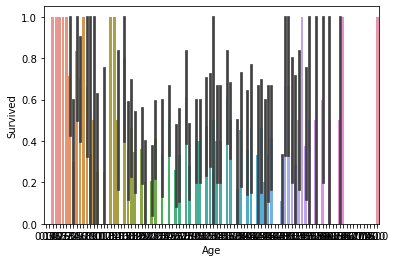

In [70]:
sns.barplot(x="Age", y="Survived", data=titanic_list)
plt.show()

In [71]:
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
titanic_list["Age"] = titanic_list["Age"].fillna(-0.5)
titanic_list['AgeGroup'] = pd.cut(titanic_list["Age"], bins, labels = labels)

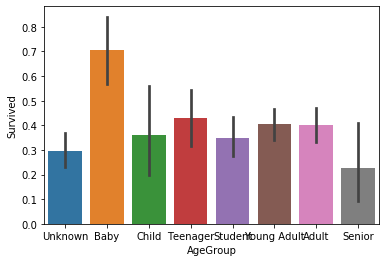

In [72]:
sns.barplot(x="AgeGroup", y="Survived", data=titanic_list)
plt.show()

In [73]:
titanic_list.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,FareGroup,InCabin,Deck,Room,AgeGroup
0,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,2.110213,S,2,0,A,False,N,49.6159,Student
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.280593,C,2,0,E,True,C,85.0000,Adult
2,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.188856,S,1,1,B,False,N,49.6159,Young Adult
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.990834,S,2,0,E,True,C,123.0000,Young Adult
4,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.202765,S,1,1,B,False,N,49.6159,Young Adult


### `Name`

Categorical variable with the name of the passenger. We extract from title names like as `Mr`, `Miss` or `Master`.

In [74]:
# Check the names
titanic_list['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [75]:
# Create the function to extract the title
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

# Apply get_title function
titanic_list['Title'] = titanic_list['Name'].apply(get_title)

In [76]:
# Check the results
pd.crosstab(titanic_list['Title'], titanic_list['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


Create groups for all frequents titles and the other will be `Rare`.

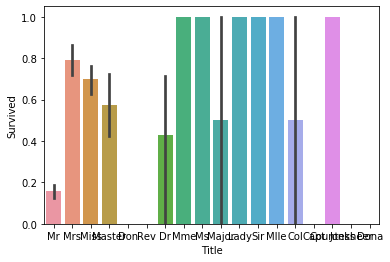

In [77]:
sns.barplot(x="Title", y="Survived", data=titanic_list)
plt.show()

In [78]:
# Convert to categorical values Title 
titanic_list["Title"] = titanic_list["Title"].replace(['Lady', 'Countess',
                                             'Capt', 'Col','Don', 'Dr', 
                                             'Major', 'Rev', 'Sir', 'Jonkheer',
                                             'Dona'], 'Rare')

In [79]:
# Check the results
pd.crosstab(titanic_list['Title'], titanic_list['Sex'])

Sex,0,1
Title,,
Master,61,0
Miss,0,260
Mlle,0,2
Mme,0,1
Mr,757,0
Mrs,0,197
Ms,0,2
Rare,25,4


In [80]:
# Check the results
pd.crosstab(titanic_list['Title'], titanic_list['Survived'])

Survived,0.0,1.0
Title,,
Master,17,23
Miss,55,127
Mlle,0,2
Mme,0,1
Mr,436,81
Mrs,26,99
Ms,0,1
Rare,15,8


In [81]:
titanic_list["Title"] = titanic_list["Title"].map({"Master":0, "Miss":1, "Ms" : 1 ,
                                         "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, 
                                         "Rare":3})

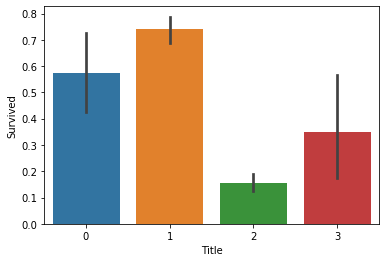

In [82]:
sns.barplot(x="Title", y="Survived", data=titanic_list)
plt.show()

In [83]:
# Check all values and new features
titanic_list.dtypes

Survived       float64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
FamilySize       int64
IsAlone          int64
FareGroup     category
InCabin           bool
Deck            object
Room           float64
AgeGroup      category
Title            int64
dtype: object

## Others feature engineering

I will test the new features using cross-validation to see if they made a difference.

`Age*Class`
This is an interaction term, since age and class are both numbers we can just multiply them.


In [84]:
titanic_list['Age*Class'] = titanic_list['Age']*titanic_list['Pclass']

`Fare per Person`

Here we divide the fare by the number of family members traveling together, I’m not exactly sure what this represents, but it’s easy enough to add in.

In [85]:
titanic_list['Fare_Per_Person'] = titanic_list['Fare']/(titanic_list['FamilySize']+1)

#### Remove features

In [86]:
# Backup titanic_list 
titanic_list_bak = titanic_list

In [87]:
titanic_list_bak.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,FareGroup,InCabin,Deck,Room,AgeGroup,Title,Age*Class,Fare_Per_Person
0,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,2.110213,S,2,0,A,False,N,49.6159,Student,2,66.0,0.703404
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.280593,C,2,0,E,True,C,85.0000,Adult,1,38.0,1.426864
2,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.188856,S,1,1,B,False,N,49.6159,Young Adult,1,78.0,1.094428
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.990834,S,2,0,E,True,C,123.0000,Young Adult,1,35.0,1.330278
4,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.202765,S,1,1,B,False,N,49.6159,Young Adult,2,105.0,1.101382


In [88]:
#titanic_list = titanic_list_bak

In [89]:
titanic_list.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,FareGroup,InCabin,Deck,Room,AgeGroup,Title,Age*Class,Fare_Per_Person
0,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,2.110213,S,2,0,A,False,N,49.6159,Student,2,66.0,0.703404
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.280593,C,2,0,E,True,C,85.0000,Adult,1,38.0,1.426864
2,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.188856,S,1,1,B,False,N,49.6159,Young Adult,1,78.0,1.094428
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.990834,S,2,0,E,True,C,123.0000,Young Adult,1,35.0,1.330278
4,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.202765,S,1,1,B,False,N,49.6159,Young Adult,2,105.0,1.101382


## Save 1st EDA, Wrangle and Cleanse data part

To be continued 2nd part for features selection

In [90]:
# Save dataset0 and dataset1 for next step: Modeling
titanic_list.to_csv('titanic_list.csv', index=False)